# EDA on COVID-19 data Bangladesh vs others (from 100 confirm and onwards)

## Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

%matplotlib inline
sns.set(rc={'figure.figsize':(20, 8)})

## Helper functions

In [2]:
def countries_dict(list_of_countries, daily=False, origin=False, date_idx=False):
    return_country_dict = {}
    for country in list_of_countries:
        cnt = world_data[world_data.Country == country].drop(['Country'], axis=1)
        if origin:
            cnt = cnt[cnt.Confirmed >= origin].reset_index(drop=True)
        cnt = cnt.reset_index(drop=True)
        if date_idx:
            cnt.Date = pd.to_datetime(cnt.Date)
            cnt = cnt.set_index('Date')
        if daily:
            cnt['Daily_Confirmed'] = np.insert(np.diff(cnt.Confirmed), 0, 0, axis=0)
            cnt['Daily_Recovered'] = np.insert(np.diff(cnt.Recovered), 0, 0, axis=0)
            cnt['Daily_Deaths'] = np.insert(np.diff(cnt.Deaths), 0, 0, axis=0)
            cnt = cnt.drop(['Confirmed', 'Recovered', 'Deaths'], axis=1).rename(columns={'Daily_Confirmed': 'Confirmed',
                                                                                         'Daily_Recovered': 'Recovered',
                                                                                         'Daily_Deaths': 'Deaths'})
        return_country_dict[country] = cnt
    return return_country_dict

In [3]:
def plot_data(countries, which, plot, xlabel=False, ylabel=False, title=False):
    if 'Bangladesh' in countries:
        bd_len = len(countries['Bangladesh'])
    if plot == 'line':
        for country in countries:
            plt.plot(countries[country][which], 'o-', label=country)
    if plot == 'dot':
        for country in countries:
            plt.plot(countries[country][which], 'o', label=country)
    if plot == 'log':
        for country in countries:
            plt.plot(np.log10(countries[country][which]), 'o-', label=country)
    if 'roll' in plot:
        roll = int(typ.split(' ')[1])
        for country in countries:
            plt.plot(countries[country].Confirmed.rolling(roll).mean(), 'o-', label=country)
        print(f'Rolling mean after {bd_len} days')
        
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend();

## Load the dataset

In [4]:
world_data = pd.read_csv('countries-aggregated.csv')

## Compersion within South Asian countries

In [5]:
bd_with_south_asia = ['Bangladesh', 'India', 'Pakistan', 'Nepal', 'Bhutan', 'Maldives', 'Afghanistan']

### Confirmed cases in log scale (cumulative)

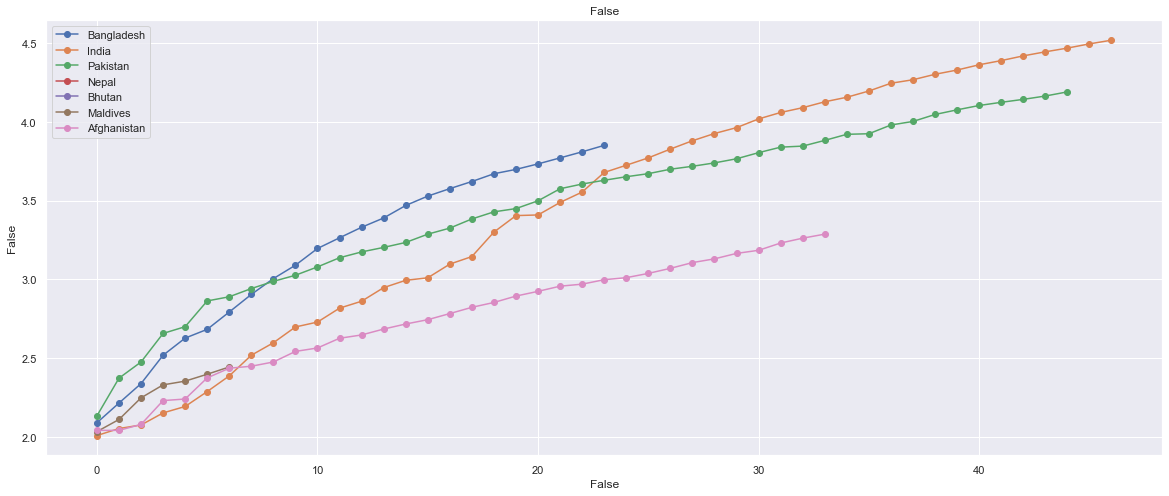

In [6]:
bd_with_south_asia_dict = countries_dict(bd_with_south_asia, origin=100)
plot_data(bd_with_south_asia_dict, which='Confirmed', plot='log')

### Recovered cases in log scale (cumulative)

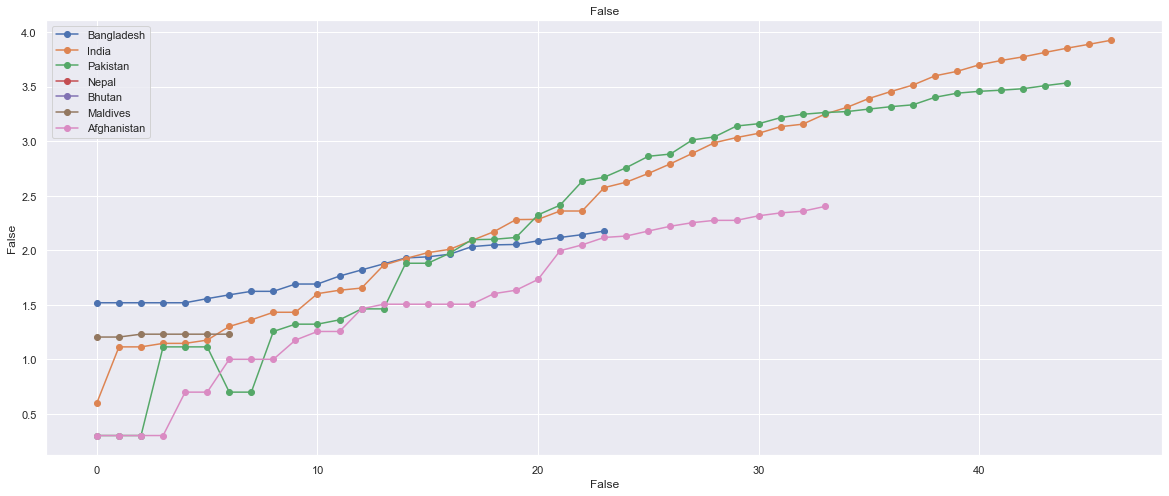

In [7]:
plot_data(bd_with_south_asia_dict, which='Recovered', plot='log')

### Deaths cases in log scale (cumulative)

C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


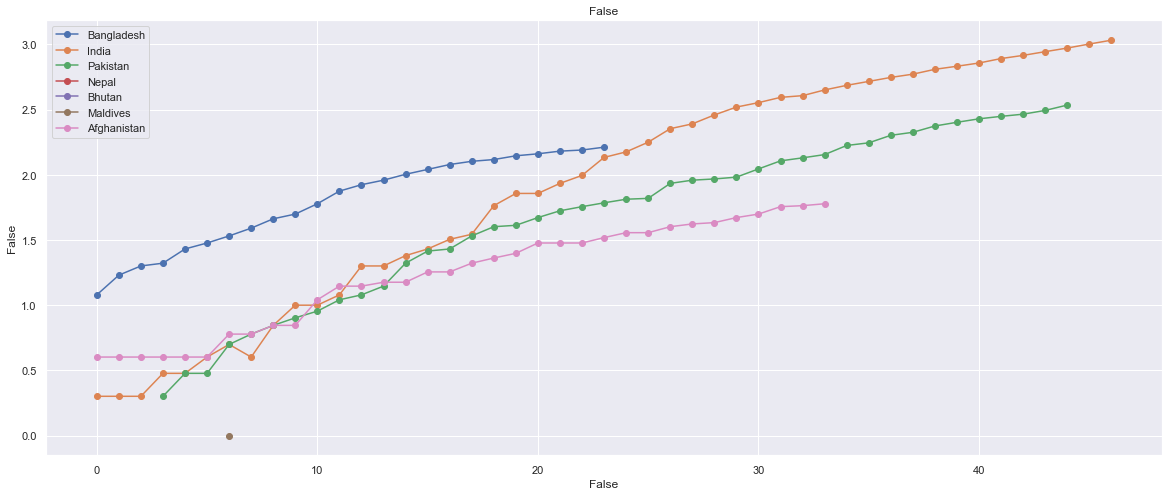

In [8]:
plot_data(bd_with_south_asia_dict, which='Deaths', plot='log')

## Compersion with Spain, Italy, France, Germany

In [9]:
bd_with_SIFG = ['Bangladesh', 'Spain', 'Italy', 'France', 'Germany']

### Confirmed cases in log scale (cumulative)

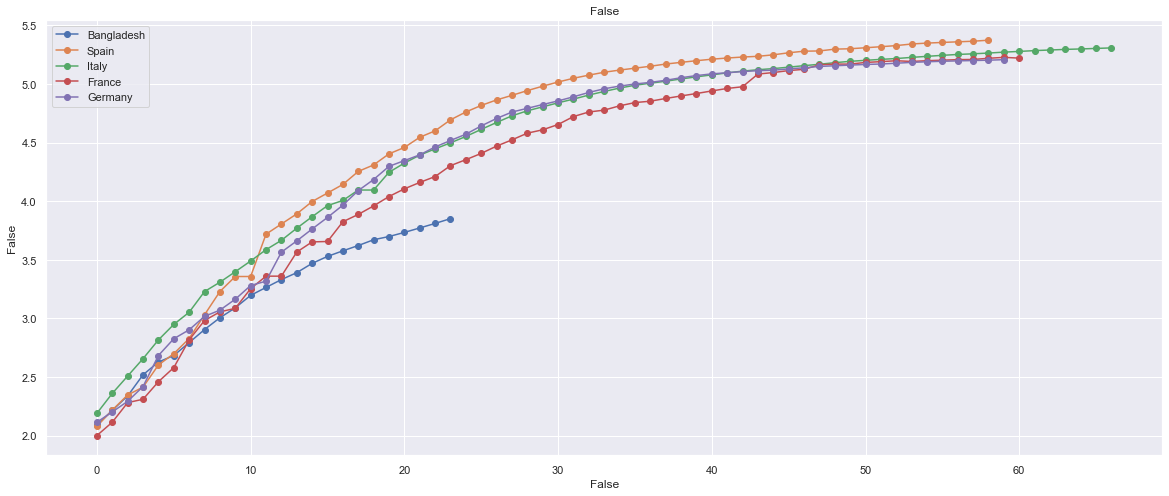

In [10]:
bd_with_SIFG_daily_dict = countries_dict(bd_with_SIFG, origin=100)
plot_data(bd_with_SIFG_daily_dict, which='Confirmed', plot='log')

### Recovered cases in log scale (cumulative)

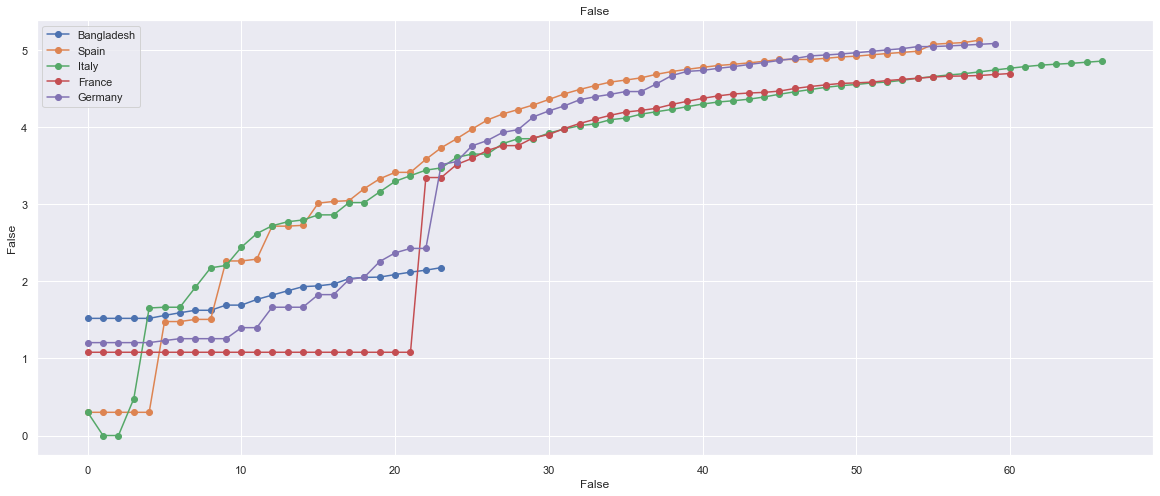

In [11]:
bd_with_SIFG_dict = countries_dict(bd_with_SIFG, origin=100)
plot_data(bd_with_SIFG_dict, which='Recovered', plot='log')

### Deaths cases in log scale (cumulative)

C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


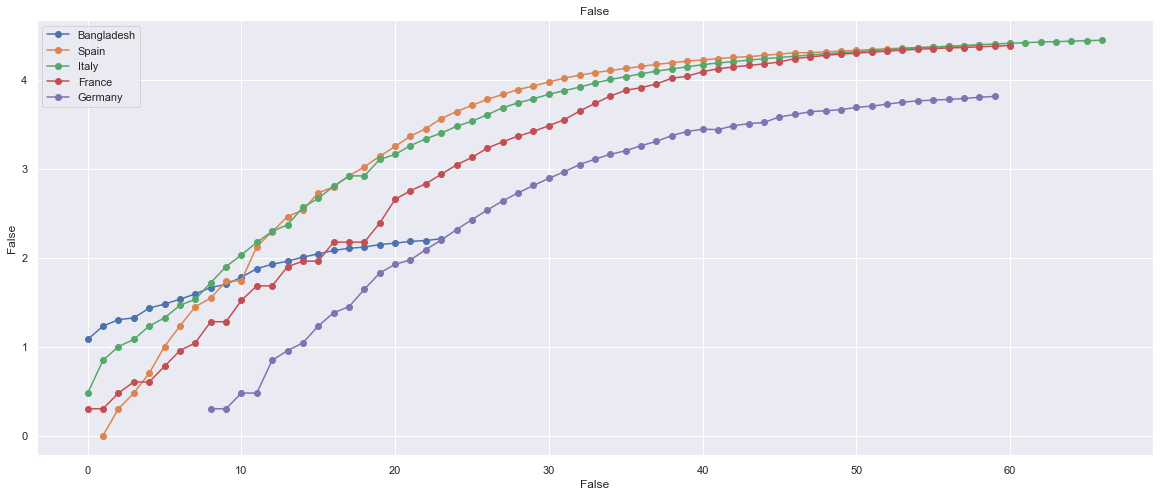

In [12]:
plot_data(bd_with_SIFG_dict, which='Deaths', plot='log')

## Compersion with US and United Kingdom

In [13]:
bd_with_USUK = ['Bangladesh', 'US', 'United Kingdom']

### Confirmed cases in log scale (cumulative)

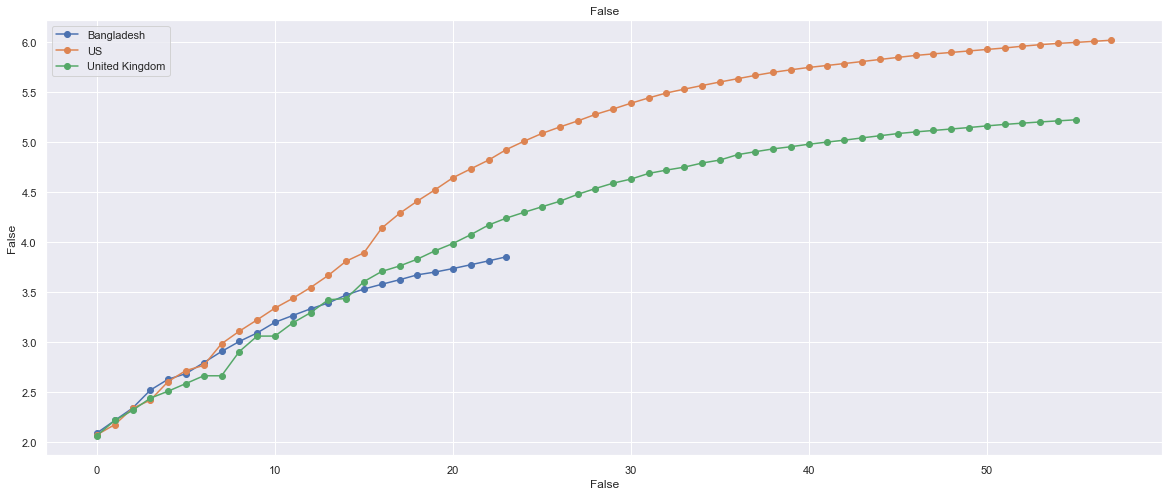

In [14]:
bd_with_USUK_daily_dict = countries_dict(bd_with_USUK, origin=100)
plot_data(bd_with_USUK_daily_dict, which='Confirmed', plot='log')

### Recovered cases in log scale (cumulative)

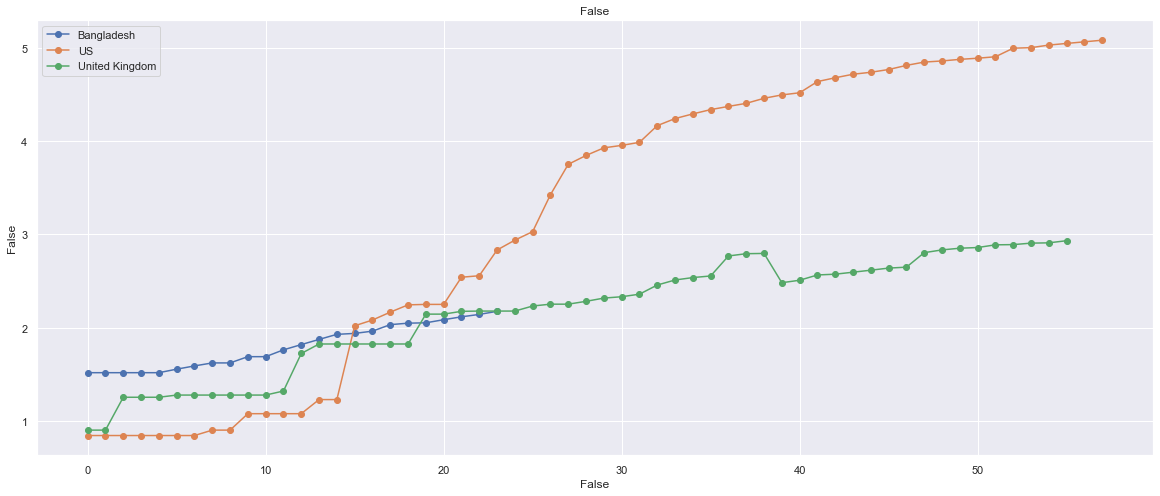

In [15]:
bd_with_USUK_dict = countries_dict(bd_with_USUK, origin=100)
plot_data(bd_with_USUK_dict, which='Recovered', plot='log')

### Deaths cases in log scale (cumulative)

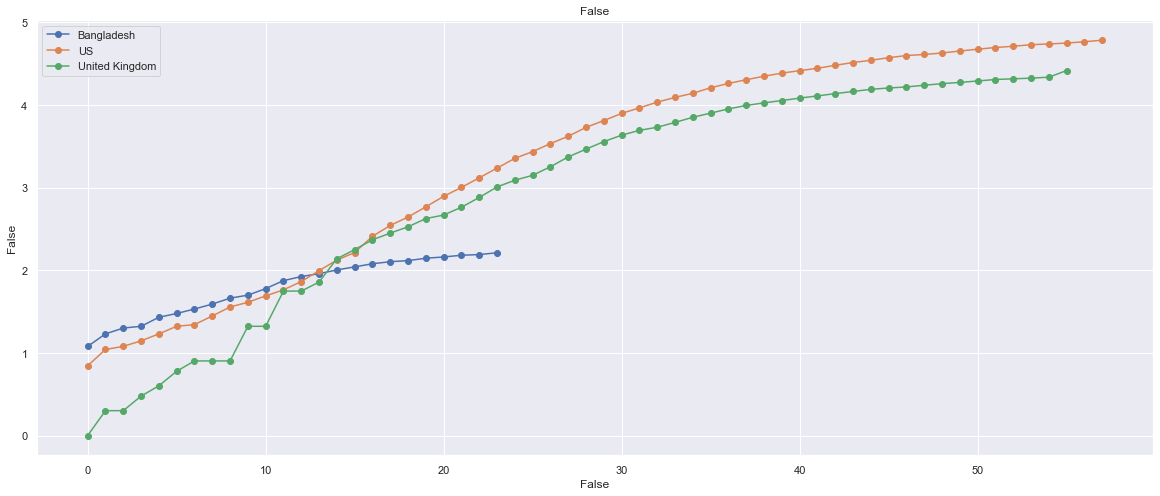

In [16]:
plot_data(bd_with_USUK_dict, which='Deaths', plot='log')

## Compersion with Turkey, Russia, Brazil, Canada

In [17]:
bd_with_TRBC = ['Bangladesh', 'Turkey', 'Russia', 'Brazil', 'Canada']

### Confirmed cases in log scale (cumulative)

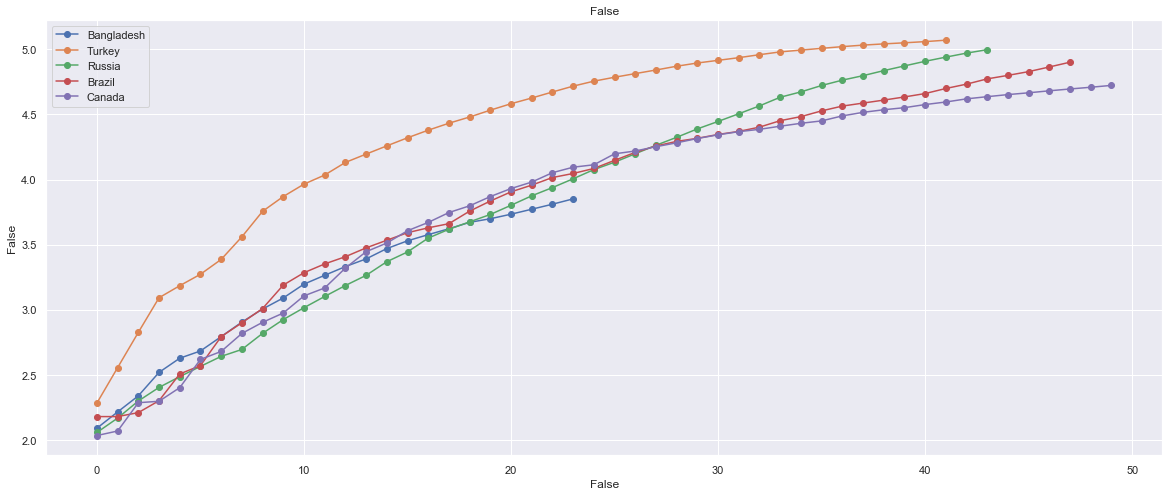

In [18]:
bd_with_USUK_dict = countries_dict(bd_with_TRBC, origin=100)
plot_data(bd_with_USUK_dict, which='Confirmed', plot='log')

### Recovered cases in log scale (cumulative)

C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


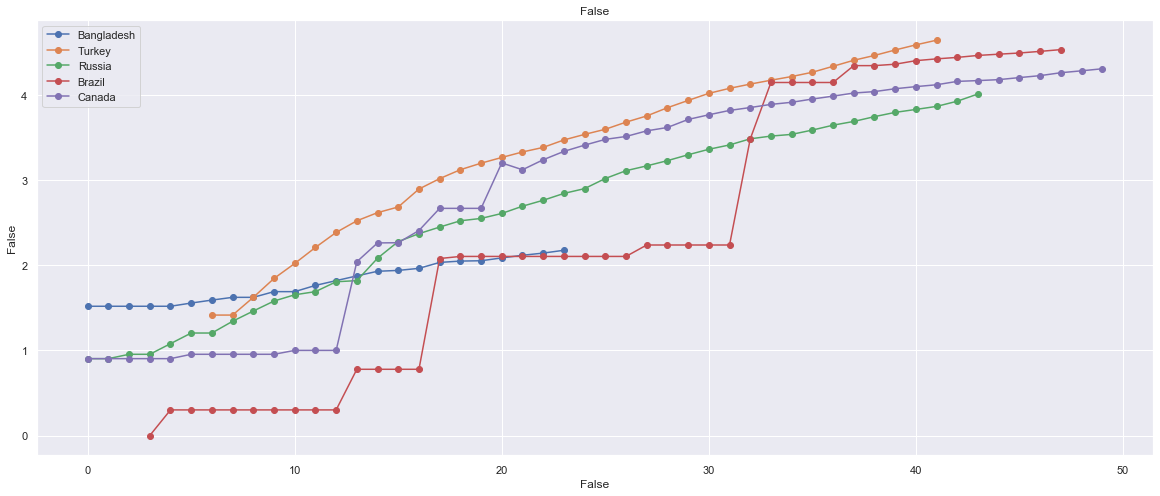

In [19]:
plot_data(bd_with_USUK_dict, which='Recovered', plot='log')

### Deaths cases in log scale (cumulative)

C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


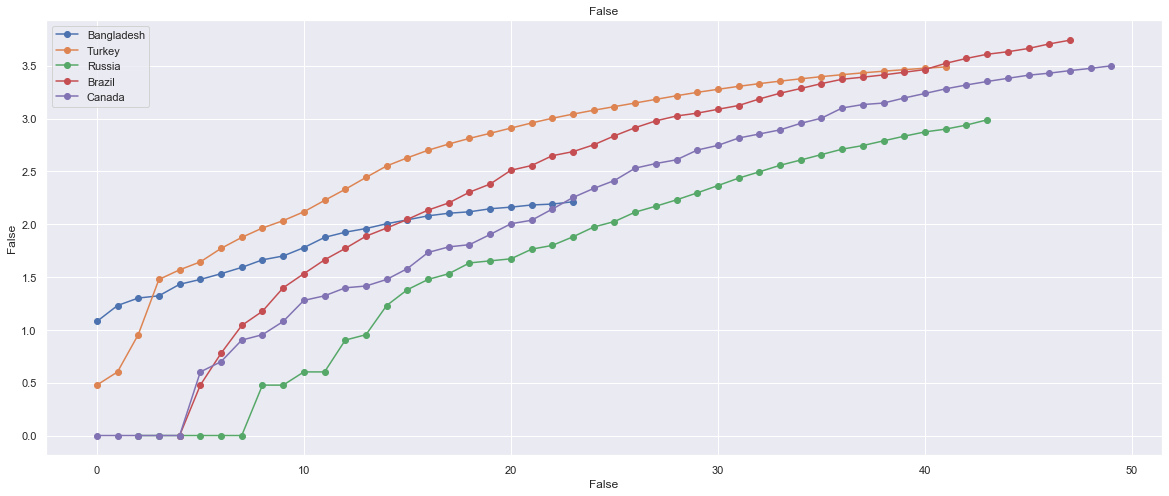

In [20]:
plot_data(bd_with_USUK_dict, which='Deaths', plot='log')

## Compersion with Brazil, Russia, India, Peru, Saudi Arabia

In [21]:
bd_with_RBIPS = ['Bangladesh', 'Russia', 'Brazil', 'India', 'Peru', 'Saudi Arabia']

### Confirmed cases in log scale (cumulative)

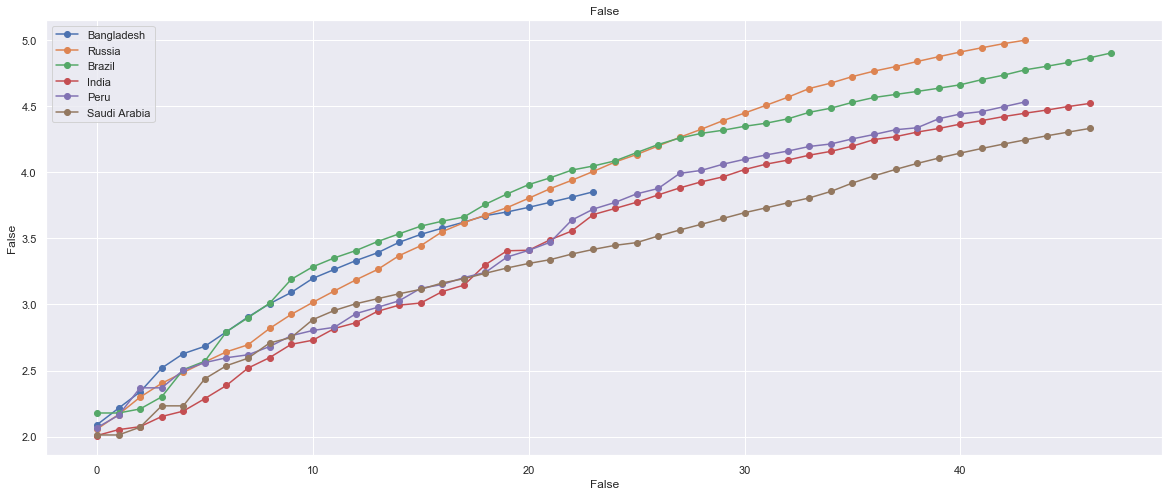

In [22]:
bd_with_RBIPS_dict = countries_dict(bd_with_RBIPS, origin=100)
plot_data(bd_with_RBIPS_dict, which='Confirmed', plot='log')

### Recovered cases in log scale (cumulative)

C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


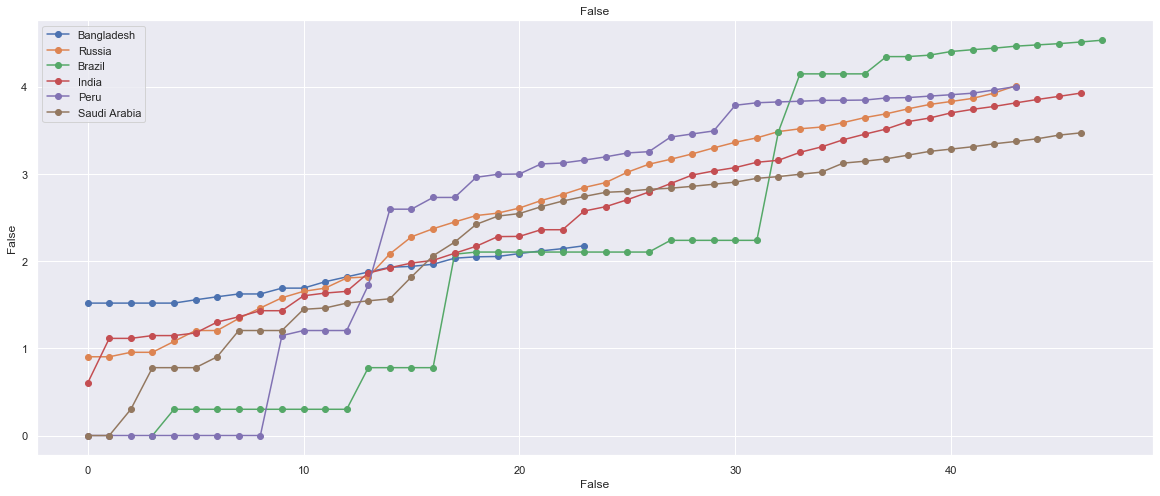

In [23]:
plot_data(bd_with_RBIPS_dict, which='Recovered', plot='log')

### Deaths cases in log scale (cumulative)

C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zshujon\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


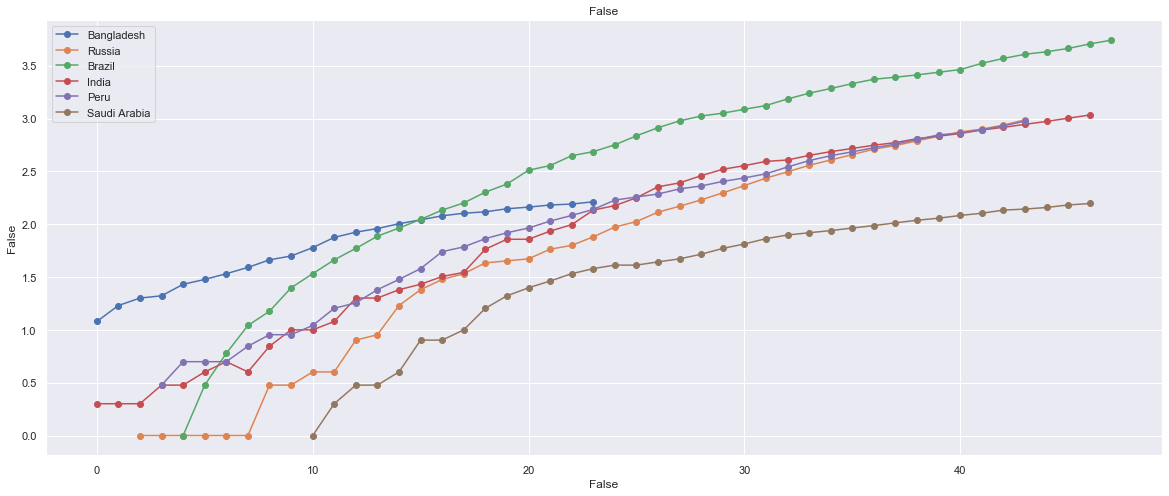

In [24]:
plot_data(bd_with_RBIPS_dict, which='Deaths', plot='log')